<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/lantibiotics/blob/main/heatmap_lenght_identity_20231029_bee2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat map

In [1]:
! pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# bees_var = [bee_13, bee_20, bee_25, bee_33, bee_41, bee_4, bee_66, bee_75]
# bees_names = ['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66', 'bee_75']

In [4]:
bees_names = ['16', '17', '39', '43', '46', '50', '51', '56']

In [5]:
len(bees_names)

8

In [6]:
bees_sample = []
for sample_name in bees_names:
  bees_sample.append(
      pd.read_csv(f'https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYP450_20231027/RNAbee_{sample_name}_S00_matches.tsv',
      sep='\t',
      header=None))
  print(len(bees_sample), sample_name)

1 16
2 17
3 39
4 43
5 46
6 50
7 51
8 56


In [7]:
from Bio import SeqIO
import requests
from io import StringIO

link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/P450_db_12062018.fasta"
data = requests.get(link).text

fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

lantibiotics_id_list = []

# Pretty print the fasta info
for seq in fasta_iterator:
  lantibiotics_id_list.append(seq.id)

name = 'CYP450'

table_data = {f'{name}': [ str(i) for i in lantibiotics_id_list]}

In [8]:
bees_sample[0]

,0,1,2,3,4,5,6,7,8,9,10,11
0,NODE_6_length_5417_cov_78.404513_3,KAI0142105.1,27.7,177,117,3,27,194,4,178,5.800000e-15,83.6
1,NODE_15_length_4282_cov_71.323634_3,KAF8247507.1,24.1,195,90,6,2,193,292,431,1.000000e-05,52.4
2,NODE_15_length_4282_cov_71.323634_3,TFJ97276.1,30.2,96,48,1,2,97,45,121,8.400000e-05,49.3
3,NODE_18_length_4191_cov_35.011122_1,WP_113690643.1,27.8,320,184,13,106,416,157,438,5.900000e-17,90.9
4,NODE_18_length_4191_cov_35.011122_1,GET01139.1,26.5,377,221,15,79,441,631,965,5.000000e-16,87.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4561,NODE_23445_length_137_cov_41.463415_1,XP_046144593.1,80.0,45,9,0,1,45,353,397,2.200000e-13,75.5
4562,NODE_23445_length_137_cov_41.463415_1,XP_046144534.1,80.0,45,9,0,1,45,353,397,2.200000e-13,75.5
4563,NODE_23445_length_137_cov_41.463415_1,XP_029054076.1,75.0,44,11,0,2,45,352,395,2.200000e-13,75.5
4564,NODE_23445_length_137_cov_41.463415_1,XP_046144536.1,80.0,45,9,0,1,45,351,395,2.900000e-13,75.1


<ipython-input-11-c4fb1b6fe6f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-11-c4fb1b6fe6f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-11-c4fb1b6fe6f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

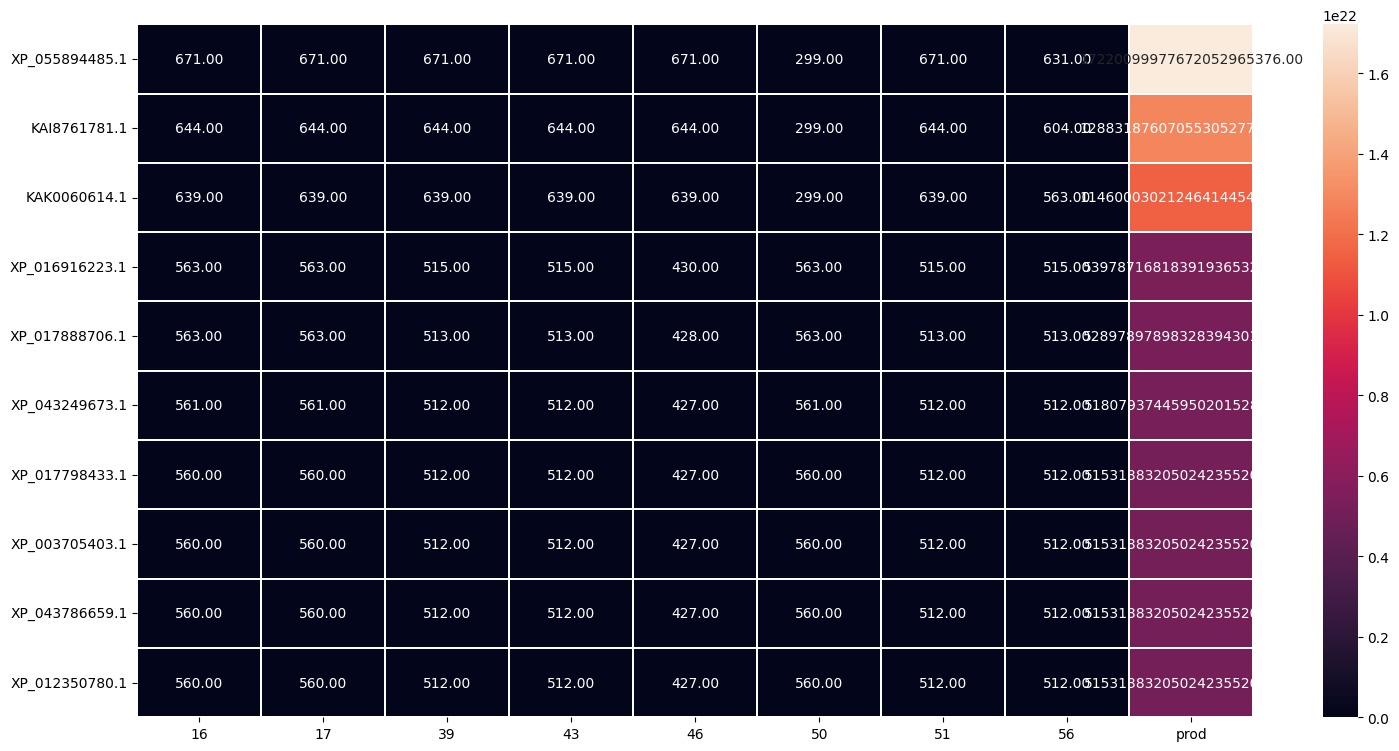

In [13]:
# !!! сделать декоратор !!!

df1 = sort_by_mulipl(make_df_for_heatmap(bees_sample, bees_names, table_data, name))
make_plot(df1)

In [14]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :4].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 3]].set_index(1).rename(columns={3: f'{nam}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names, table_data, amino_as_name):

  df = pd.DataFrame(table_data).drop_duplicates().set_index(f'{amino_as_name}')
  df.drop_duplicates(subset=[f'{amino_as_name}'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)

def most_probable_sequence(df):
  df['sum'] = df.sum (axis=1)
  df.sort_values(by='sum', ascending=False, inplace=True)

  # pos = len(df.columns) - 1
  # df.drop(columns=df.columns[pos], inplace=True)
  return df

def sort_by_mulipl(df):
  df['prod'] = df.product(axis=1)
  df.sort_values(by='prod', ascending=False, inplace=True)

  # pos = len(df.columns) - 1
  # df.drop(columns=df.columns[pos], inplace=True)
  return df

def make_plot(df):
  l = len(df.columns)
  num_rows, num_cols = df.iloc[:10, :l].shape
  fig_width = max(10, num_cols * 2)
  fig_height = max(l, num_rows * 0.5)

  f, ax = plt.subplots(figsize=(fig_width, fig_height))
  sns.heatmap(df.iloc[:10, :l], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

  plt.show()

In [15]:
df1.columns

Index(['16', '17', '39', '43', '46', '50', '51', '56', 'prod'], dtype='object')

<ipython-input-14-c4fb1b6fe6f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-14-c4fb1b6fe6f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-14-c4fb1b6fe6f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

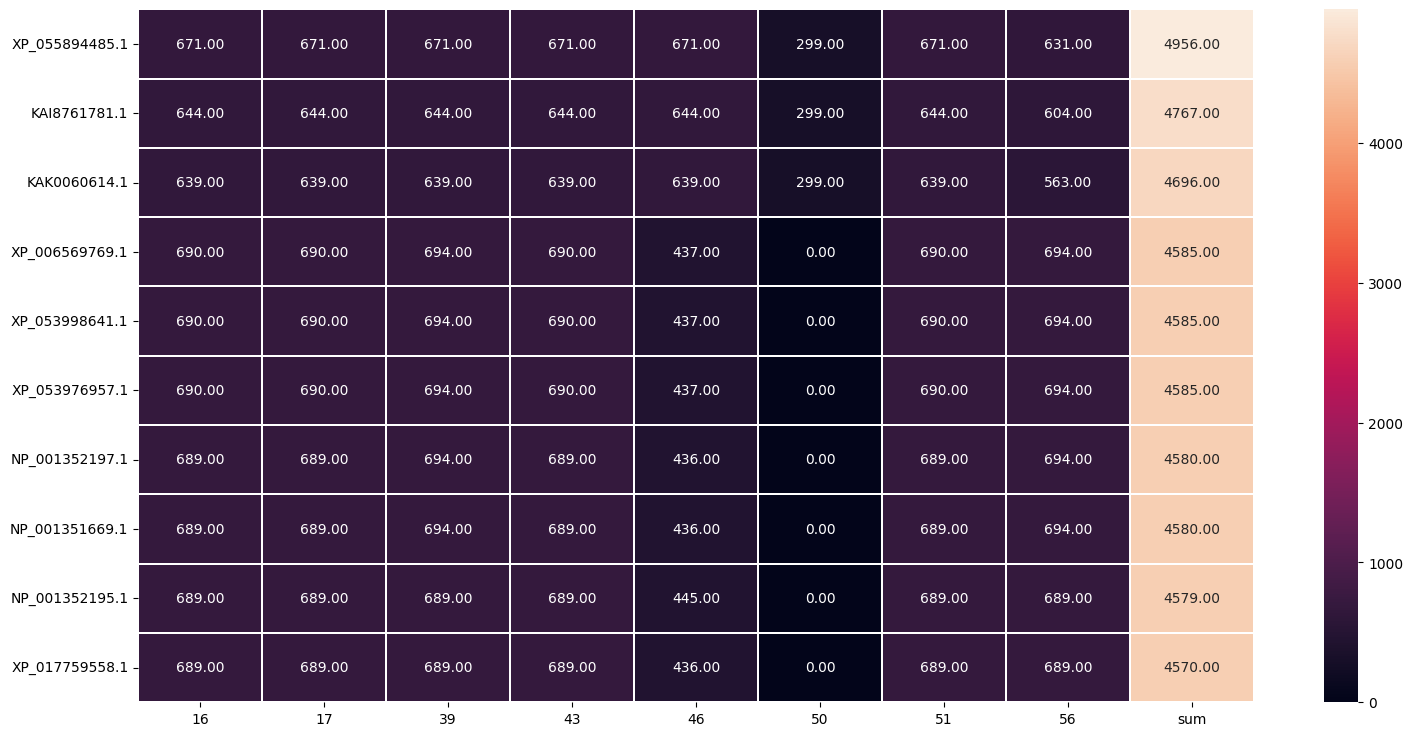

In [16]:
df_lens = most_probable_sequence(make_df_for_heatmap(bees_sample, bees_names, table_data, name))
make_plot(df_lens)

In [17]:
cyp_indeces_sorted = pd.DataFrame(df1.index).set_index(0)


In [18]:
df_lens['prod'] = df1['prod']
df_lens.sort_values(by='prod', ascending=False, inplace=True)

In [19]:
df_lens

,16,17,39,43,46,50,51,56,sum,prod
XP_055894485.1,671.0,671.0,671.0,671.0,671.0,299.0,671.0,631.0,4956.0,1.722010e+22
KAI8761781.1,644.0,644.0,644.0,644.0,644.0,299.0,644.0,604.0,4767.0,1.288319e+22
KAK0060614.1,639.0,639.0,639.0,639.0,639.0,299.0,639.0,563.0,4696.0,1.146000e+22
XP_016916223.1,563.0,563.0,515.0,515.0,430.0,563.0,515.0,515.0,4179.0,5.397872e+21
XP_017888706.1,563.0,563.0,513.0,513.0,428.0,563.0,513.0,513.0,4169.0,5.289790e+21
...,...,...,...,...,...,...,...,...,...,...
KAH6617656.1,0.0,493.0,375.0,493.0,0.0,0.0,375.0,298.0,2034.0,0.000000e+00
WP_206071825.1,534.0,394.0,0.0,555.0,555.0,0.0,0.0,0.0,2038.0,0.000000e+00
KAJ0553160.1,289.0,289.0,384.0,289.0,0.0,0.0,493.0,313.0,2057.0,0.000000e+00
KAK0669857.1,0.0,503.0,375.0,503.0,0.0,0.0,375.0,303.0,2059.0,0.000000e+00


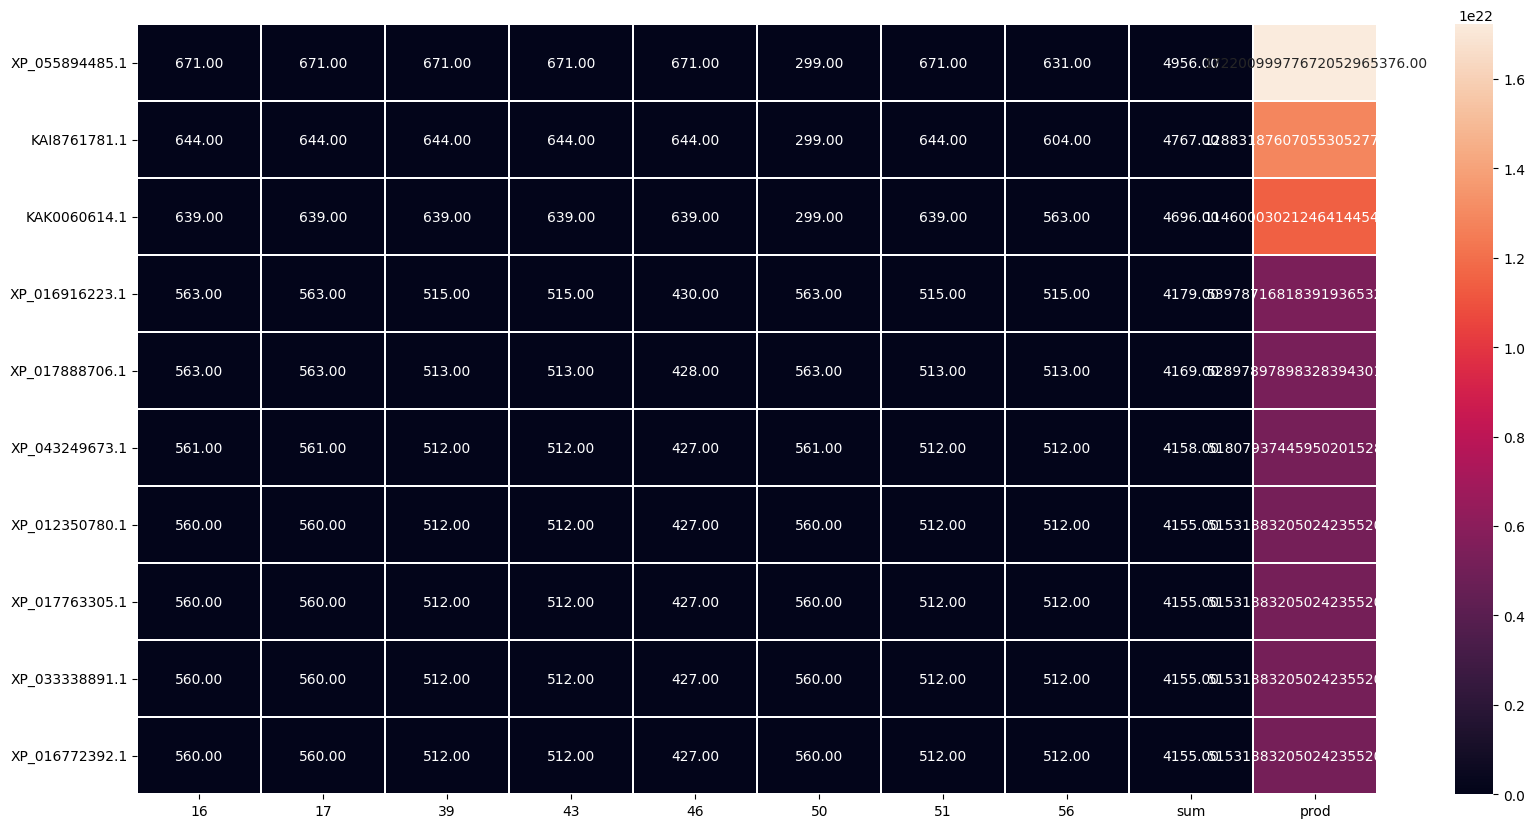

In [20]:
make_plot(df_lens)

<Axes: >

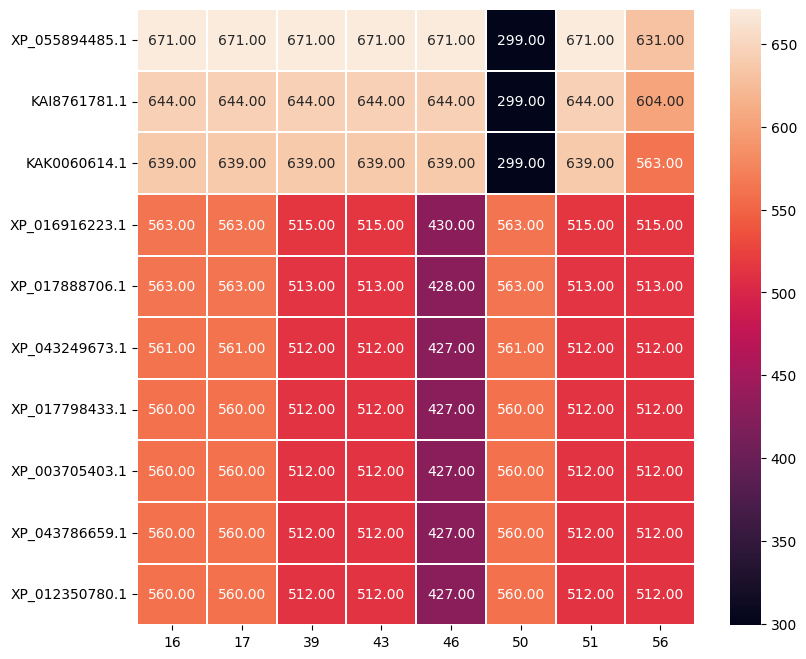

In [21]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df1.iloc[:10, :8], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

<Axes: >

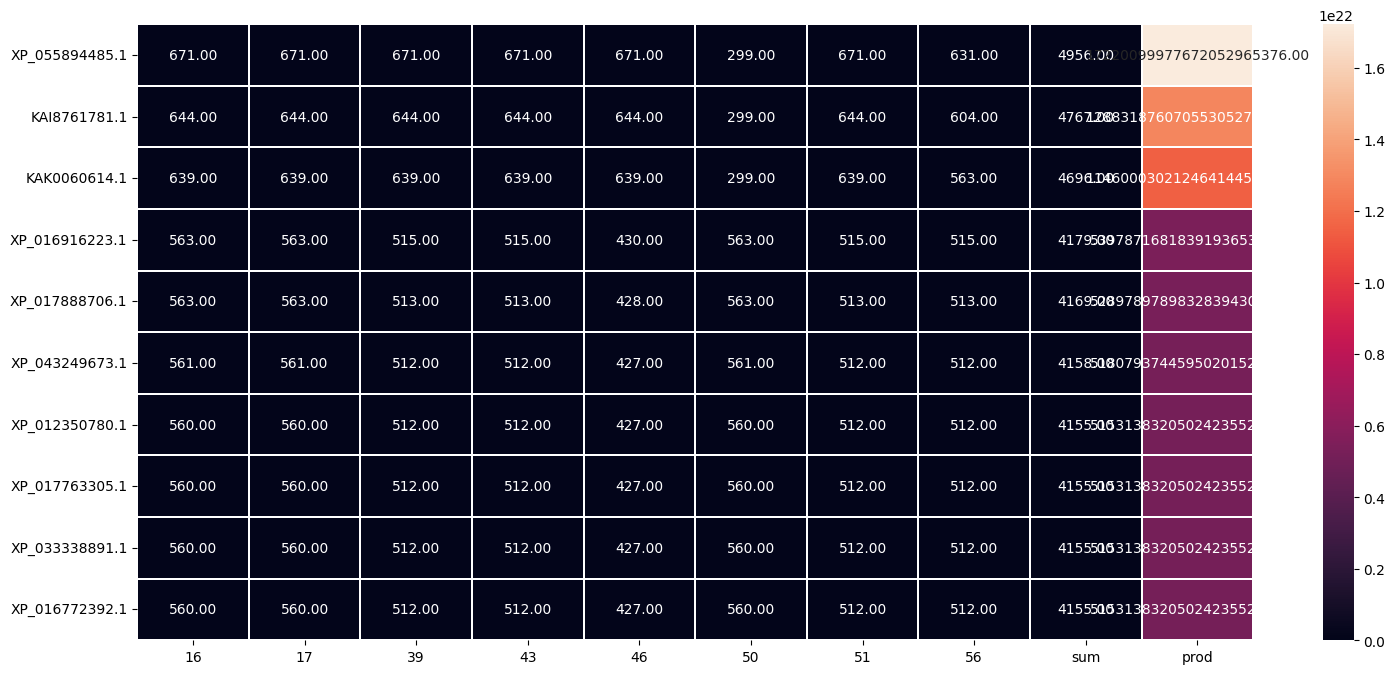

In [22]:
f, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df_lens.iloc[:10, :16], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1420 entries, XP_055894485.1 to XP_970738.2
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   16      1420 non-null   float64
 1   17      1420 non-null   float64
 2   39      1420 non-null   float64
 3   43      1420 non-null   float64
 4   46      1420 non-null   float64
 5   50      1420 non-null   float64
 6   51      1420 non-null   float64
 7   56      1420 non-null   float64
 8   prod    1420 non-null   float64
dtypes: float64(9)
memory usage: 143.2+ KB
